## Business Context (Steel Industry – Energy & Emissions Monitoring)

The steel industry is one of the most energy-intensive and carbon-emitting sectors globally. Large steel manufacturing plants operate heavy machinery such as furnaces, rolling mills, induction motors, cooling systems, and electric arc furnaces, all of which consume substantial electrical power.
Electricity usage directly impacts:

* Operational cost (energy bills)

* Equipment load efficiency

* Power factor penalties

* Carbon emissions (CO₂ footprint)

* Production scheduling and downtime costs

To maintain competitiveness and meet sustainability goals, steel plants increasingly rely on data-driven energy management. Continuous monitoring of electrical parameters (kWh usage, reactive power, power factor), temporal patterns (day, hour, week status), and load types enables companies to reduce energy losses, forecast demand, optimize power factor correction, and monitor CO₂ output.

This dataset contains time-stamped records of energy usage and electrical parameters from a steel industry facility. It allows insights into energy consumption patterns, load characteristics, and environmental impact, helping the plant move toward smart energy optimization and cost-efficient production.

## Problem Statement

The goal of this project is to analyze and model energy consumption patterns in a steel manufacturing environment using historical operational data. Specifically, the project aims to:

1. Understand how electrical variables affect energy usage

Conduct exploratory analysis to identify how factors such as reactive power, power factor, load type, and day-of-week influence Usage_kWh and CO₂ emissions.

2. Build predictive models for energy usage and emissions

Using past data (35,040 instances), develop models to:

* Predict short-term energy consumption (Usage_kWh)

* Predict CO₂ emissions (tCO₂)

* Predict Load_Type (e.g., Normal Load, High Load, Critical Load)

These predictions will help the steel plant:

* Reduce energy cost

* Improve load management

* Avoid penalties due to poor power factor

* Optimize machinery scheduling

* Support sustainability reporting

3. Detect inefficient or abnormal usage patterns

* Analyze whether certain time periods or load conditions show:

* Unusual spikes in kWh usage

* Poor power factor (lagging or leading)

* Excess reactive power

* Higher-than-normal CO₂ generation

This enables preventive maintenance, load balancing, and strategic energy optimization.

“Build a data-driven energy intelligence system for a steel plant to analyze, predict, and optimize electricity usage and CO₂ emissions using historical operational and electrical data.”

# 📊 Steel Industry Energy Consumption EDA
This notebook performs Exploratory Data Analysis on the steel industry energy dataset (35,040 rows).  
We explore usage patterns, CO₂ emissions, power factor behavior, reactive power, and load characteristics.


# Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


# Datasets

In [2]:
Old_Data = pd.read_csv(r"D:\#Great Learning\MY\Project\Datasets\Steel Industry\Old Data.csv")
New_Data = pd.read_csv(r"D:\#Great Learning\MY\Project\Datasets\Steel Industry\New Data.csv")

# Shape and Basic Info

In [3]:
print("Old_Data Shape:",Old_Data.shape)
Old_Data.info()

Old_Data Shape: (28032, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28032 entries, 0 to 28031
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  28032 non-null  object 
 1   Usage_kWh                             28032 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  28032 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  28032 non-null  float64
 4   CO2(tCO2)                             28032 non-null  float64
 5   Lagging_Current_Power_Factor          28032 non-null  float64
 6   Leading_Current_Power_Factor          28032 non-null  float64
 7   NSM                                   28032 non-null  int64  
 8   WeekStatus                            28032 non-null  object 
 9   Day_of_week                           28032 non-null  object 
 10  Load_Type                             28032 non-null  

In [4]:
print("New_Data Shape:",New_Data.shape)
New_Data.info()

New_Data Shape: (7008, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  7008 non-null   object 
 1   Usage_kWh                             7008 non-null   float64
 2   Lagging_Current_Reactive.Power_kVarh  7008 non-null   float64
 3   Leading_Current_Reactive_Power_kVarh  7008 non-null   float64
 4   CO2(tCO2)                             7008 non-null   float64
 5   Lagging_Current_Power_Factor          7008 non-null   float64
 6   Leading_Current_Power_Factor          7008 non-null   float64
 7   NSM                                   7008 non-null   int64  
 8   WeekStatus                            7008 non-null   object 
 9   Day_of_week                           7008 non-null   object 
 10  Load_Type                             7008 non-null   obj

# Convert Date Column & Sort by Date

In [5]:
New_Data['date']= pd.to_datetime(New_Data['date'])
New_Data = New_Data.sort_values(by='date').reset_index(drop=True)

In [6]:
Old_Data['date']= pd.to_datetime(Old_Data['date'])
Old_Data = Old_Data.sort_values(by='date').reset_index(drop=True)

# Descriptive Statistics

In [7]:
Old_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,28032.0,27.925647,33.921358,2.45,3.13,4.61,51.26,153.14
Lagging_Current_Reactive.Power_kVarh,28032.0,13.256993,16.485799,0.00,2.74,5.04,22.90,96.91
Leading_Current_Reactive_Power_kVarh,28032.0,3.860065,7.480779,0.00,0.00,0.00,2.09,27.76
CO2(tCO2),28032.0,0.011808,0.016355,0.00,0.00,0.00,0.02,0.07
Lagging_Current_Power_Factor,28032.0,79.947038,19.388467,36.94,61.64,87.98,99.07,100.00
Leading_Current_Power_Factor,28032.0,84.540143,30.378190,12.50,99.82,100.00,100.00,100.00
NSM,28032.0,42750.000000,24940.623291,0.00,21375.00,42750.00,64125.00,85500.00


In [8]:
New_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,7008.0,25.231874,31.374169,0.0,3.5300,4.43,51.1600,157.18
Lagging_Current_Reactive.Power_kVarh,7008.0,12.148944,15.535605,0.0,2.0200,4.54,21.8500,80.46
Leading_Current_Reactive_Power_kVarh,7008.0,3.914485,7.195150,0.0,0.0000,0.00,1.9175,22.68
CO2(tCO2),7008.0,0.010390,0.015256,0.0,0.0000,0.00,0.0200,0.07
Lagging_Current_Power_Factor,7008.0,83.102128,16.688625,0.0,75.2800,87.93,98.5750,100.00
Leading_Current_Power_Factor,7008.0,83.678776,30.760457,0.0,99.3375,100.00,100.0000,100.00
NSM,7008.0,42750.000000,24941.958026,0.0,21375.0000,42750.00,64125.0000,85500.00


# Missing Value Check

In [9]:
Old_Data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [10]:
New_Data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

# Check Categorical Columns

In [11]:
Old_Data.select_dtypes(include=['object'])

,WeekStatus,Day_of_week,Load_Type
0,Weekday,Monday,Light_Load
1,Weekday,Monday,Light_Load
2,Weekday,Monday,Light_Load
3,Weekday,Monday,Light_Load
4,Weekday,Monday,Light_Load
...,...,...,...
28027,Weekday,Friday,Medium_Load
28028,Weekday,Friday,Medium_Load
28029,Weekday,Friday,Light_Load
28030,Weekday,Friday,Light_Load


In [12]:
cat_cols = Old_Data.select_dtypes(include=['object']).columns
num_cols = Old_Data.select_dtypes(include=['int64','float64']).columns
for col in cat_cols:
    print(f"Column: {col} ")
    print(Old_Data[col].value_counts())
    print("\n")


Column: WeekStatus 
Weekday    20160
Weekend     7872
Name: WeekStatus, dtype: int64


Column: Day_of_week 
Monday       4032
Thursday     4032
Tuesday      4032
Friday       4032
Wednesday    4032
Sunday       3936
Saturday     3936
Name: Day_of_week, dtype: int64


Column: Load_Type 
Light_Load      14368
Medium_Load      7808
Maximum_Load     5856
Name: Load_Type, dtype: int64




## Correlation Heatmap

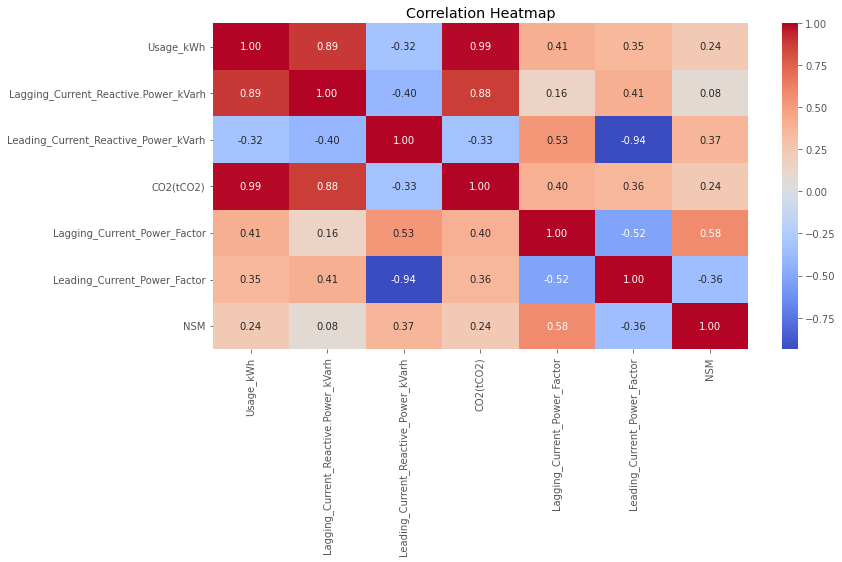

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(Old_Data.corr(),annot=True,fmt=".2f",cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Energy Usage Trend Over Time

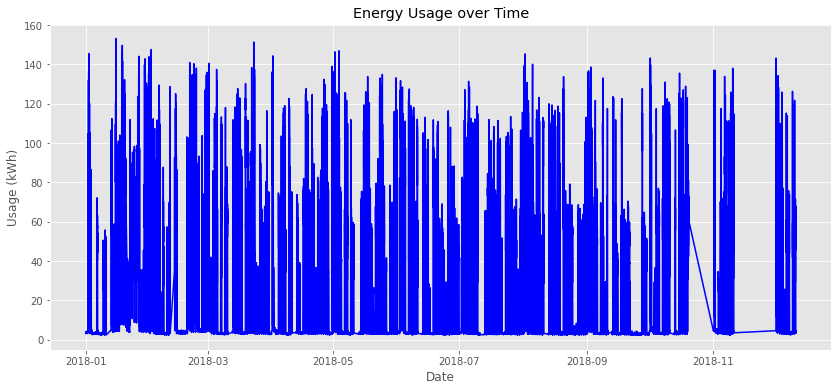

In [14]:
plt.figure(figsize=(14,6))
plt.plot(Old_Data['date'], Old_Data['Usage_kWh'], color='blue', label='Energy Usage')
plt.title('Energy Usage over Time')
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.show()

## CO₂ Emission Trend Over Time

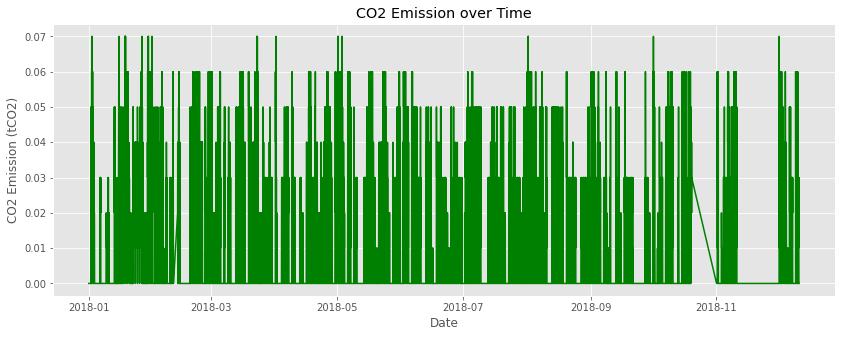

In [15]:
plt.figure(figsize=(14,5))
plt.plot(Old_Data['date'],Old_Data['CO2(tCO2)'],color='green',label='CO2 Emission')
plt.title('CO2 Emission over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emission (tCO2)')
plt.show()

## Outlier Detection (Box Plot)

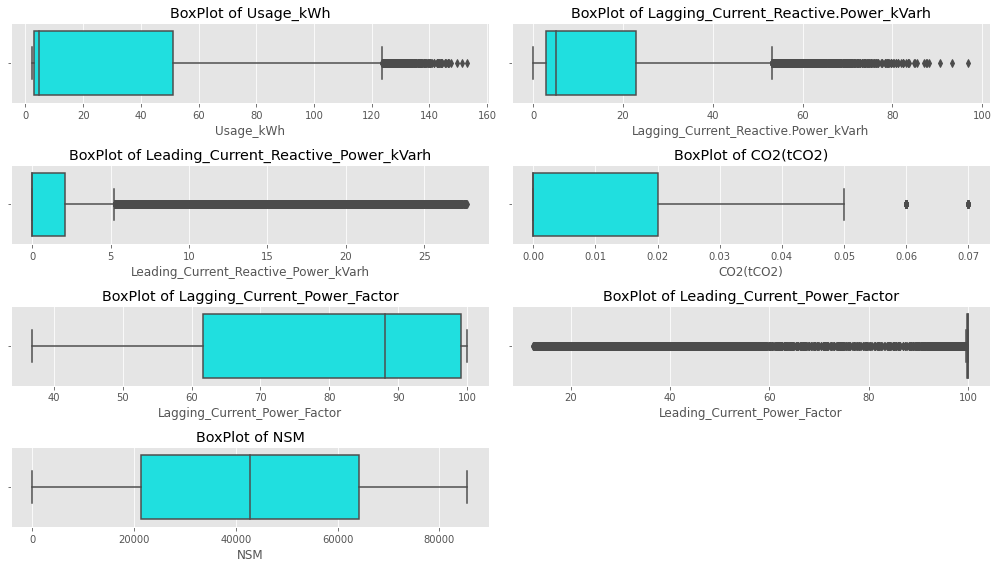

In [16]:
plt.figure(figsize=(14,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,2,i)
    sns.boxplot(x=Old_Data[col],color='cyan')
    plt.title(f'BoxPlot of {col}')

plt.tight_layout()
plt.show()

## Energy Usage by Day of Week

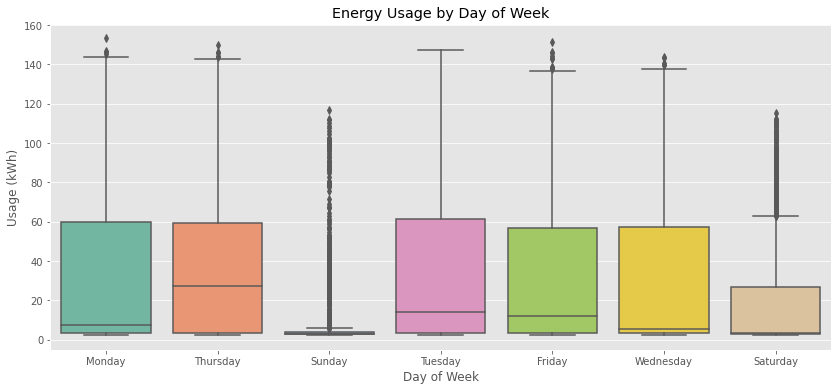

In [17]:
plt.figure(figsize=(14,6))
sns.boxplot(x=Old_Data['Day_of_week'],y=Old_Data['Usage_kWh'],palette='Set2')
plt.title('Energy Usage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Usage (kWh)')
plt.show()

## Energy Usage by Load Type

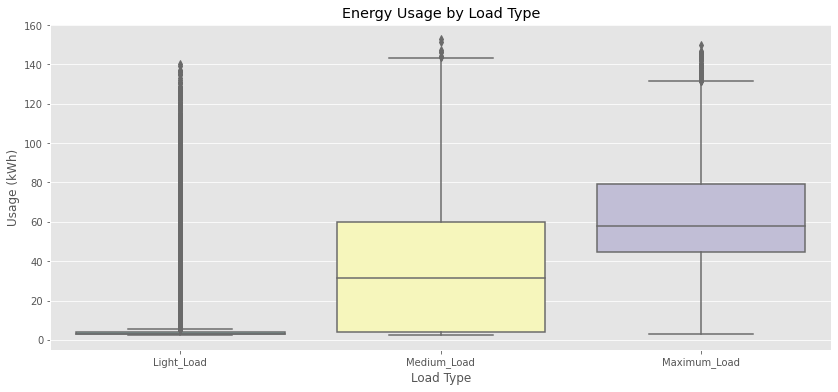

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x=Old_Data['Load_Type'],y=Old_Data['Usage_kWh'],palette='Set3')
plt.title('Energy Usage by Load Type')
plt.xlabel('Load Type')
plt.ylabel('Usage (kWh)')
plt.show()

## Weekday vs Weekend Analysis

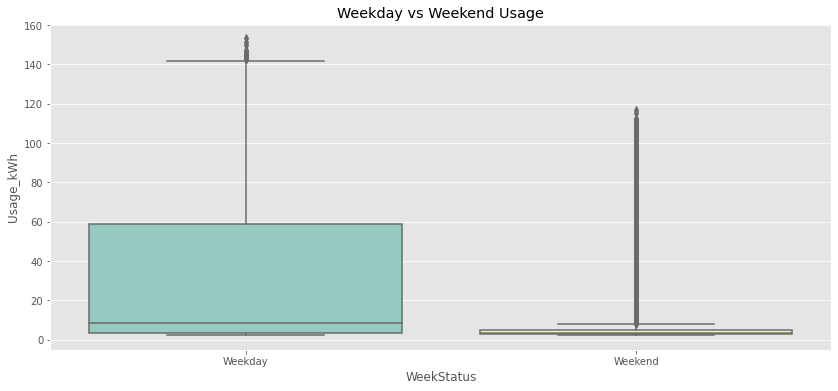

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(x=Old_Data['WeekStatus'],y=Old_Data['Usage_kWh'],palette='Set3')
plt.title('Weekday vs Weekend Usage')
plt.show()


## Pairplot (optional — heavy)

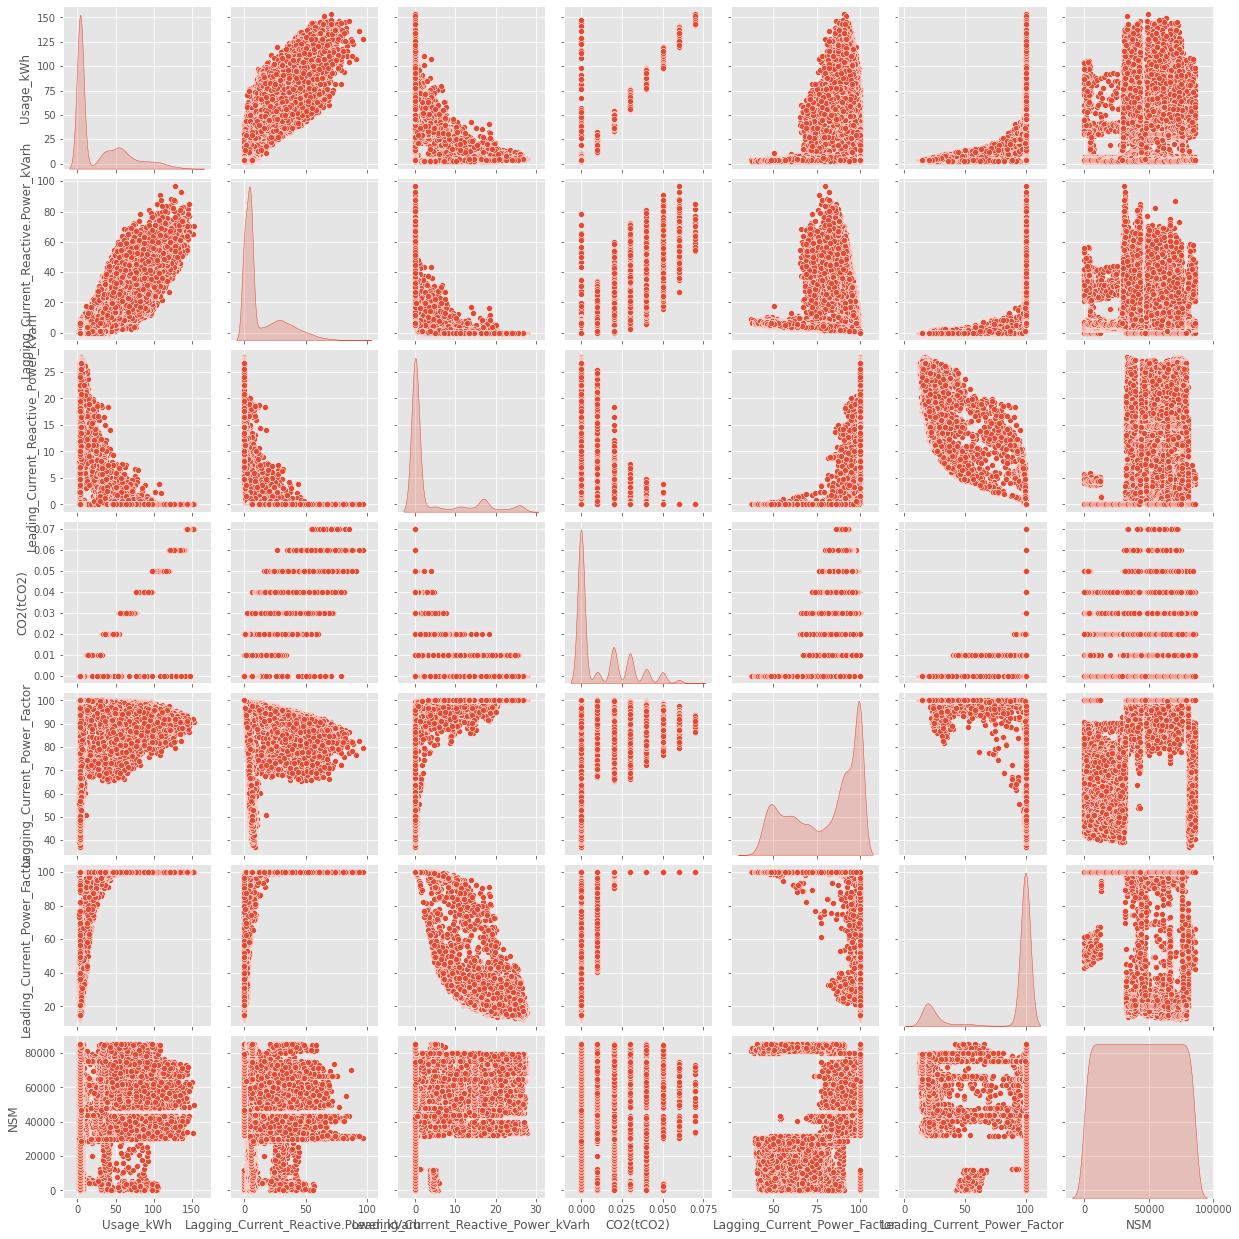

In [20]:
sns.pairplot(Old_Data[num_cols],diag_kind='kde',palette='Set2')

# EDA Summary 

### Key Findings:
- Energy usage shows strong temporal patterns.
- CO₂ emissions correlate with energy usage.
- Power factor fluctuates across load types.
- Weekends show different usage compared to weekdays.
- Reactive power significantly affects total consumption.
- Load_Type shows clear separation in energy patterns.

These insights will guide feature engineering and model selection.

# Feature Engineering

In [21]:
# Copy dataset
df_fe = Old_Data.copy()

print("Before Feature Engineering:")
display(df_fe.head())

Before Feature Engineering:


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:00:00,3.42,3.46,0.0,0.0,70.30,100.0,0,Weekday,Monday,Light_Load
1,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
2,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
3,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
4,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load


# 1. Handling Missing Values

In [22]:
# Numerical features --> median
df_fe[num_cols] = df_fe[num_cols].fillna(df_fe[num_cols].median())

# Categorical features --> mode
df_fe[cat_cols] = df_fe[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# 2. Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df_fe[col] = le.fit_transform(df_fe[col])

# 3. TIME-BASED FEATURES

In [24]:
df_fe['Hour'] = df_fe['date'].dt.hour
df_fe['Day'] = df_fe['date'].dt.day
df_fe['Month'] = df_fe['date'].dt.month
df_fe['Year'] = df_fe['date'].dt.year
df_fe['Week'] = df_fe['date'].dt.isocalendar().week.astype(int)

# Weekend flag
df_fe['Is_Weekend'] = df_fe['Day_of_week'].apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

# Peak hour (Industry: 8 AM – 8 PM)
df_fe['Is_Peak_Hour'] = df_fe['Hour'].apply(lambda x: 1 if 8 <= x <= 20 else 0)


# 4. ENERGY FEATURES

In [25]:
# Total Reactive Power (lagging + leading)
df_fe['Total_Reactive_Power_kVarh'] = (
    df_fe['Lagging_Current_Reactive.Power_kVarh'] +
    df_fe['Leading_Current_Reactive_Power_kVarh']
)

# Net Reactive Power (lagging - leading)
df_fe['Net_Reactive_Power'] = (
    df_fe['Lagging_Current_Reactive.Power_kVarh'] -
    df_fe['Leading_Current_Reactive_Power_kVarh']
)

# Power factor difference
df_fe['PF_Difference'] = (
    df_fe['Lagging_Current_Power_Factor'] -
    df_fe['Leading_Current_Power_Factor']
)

# Energy intensity (kWh per NSM)
df_fe['Energy_Intensity'] = df_fe['Usage_kWh'] / (df_fe['NSM'] + 1)

# 3. CATEGORICAL ENCODING

In [26]:
# # Encode WeekStatus (e.g., 'Weekday'/'Weekend')
# df_fe['WeekStatus_Encoded'] = df_fe['WeekStatus'].map({'Weekday': 0, 'Weekend': 1})

# Encode Load_Type
df_fe['Load_Type_Encoded'] = df_fe['Load_Type'].astype('category').cat.codes

# Preview
df_fe.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,...,Month,Year,Week,Is_Weekend,Is_Peak_Hour,Total_Reactive_Power_kVarh,Net_Reactive_Power,PF_Difference,Energy_Intensity,Load_Type_Encoded
0,2018-01-01 00:00:00,3.42,3.46,0.0,0.0,70.30,100.0,0,0,1,...,1,2018,1,0,0,3.46,3.46,-29.70,3.420000,0
1,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,...,1,2018,1,0,0,2.95,2.95,-26.79,0.003518,0
2,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,...,1,2018,1,0,0,4.46,4.46,-33.23,0.002221,0
3,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,...,1,2018,1,0,0,3.28,3.28,-29.72,0.001200,0
4,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,...,1,2018,1,0,0,3.56,3.56,-31.91,0.000919,0


In [27]:
df_fe.shape

(28032, 23)

In [28]:
df_fe.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Hour', 'Day', 'Month',
       'Year', 'Week', 'Is_Weekend', 'Is_Peak_Hour',
       'Total_Reactive_Power_kVarh', 'Net_Reactive_Power', 'PF_Difference',
       'Energy_Intensity', 'Load_Type_Encoded'],
      dtype='object')

# Data Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

df_prep = df_fe.copy()



In [30]:
df_prep = df_prep.drop(columns=['date'])


In [45]:
# Handle missing data
# numeric -> Median
num_cols = df_prep.select_dtypes(include=['int64','float64']).columns
df_prep[num_cols] = df_prep[num_cols].fillna(df_prep[num_cols].median())

# categorical -> Mode
cat_cols = df_prep.select_dtypes(include=['object']).columns
df_prep[cat_cols] = df_prep[cat_cols].fillna(df_prep[cat_cols].mode())

# Encode numerical variables
scaler = StandardScaler()
df_prep[num_cols] = scaler.fit_transform(df_prep[num_cols])

# Time based train-test split
# df_prep =df_prep.sort_values(by='date')

# Define target variables
target_vars = ['Usage_kWh']

x= df_prep.drop(columns=target_vars)
y= df_prep[target_vars]

# Train-test split (80-20)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,shuffle=False)

print("Training set shape:",x_train.shape,y_train.shape)
print("Testing set shape:",x_test.shape,y_test.shape)

Training set shape: (22425, 21) (22425, 1)
Testing set shape: (5607, 21) (5607, 1)


In [48]:
transformer = PowerTransformer(method='yeo-johnson',standardize=True)
df_prep[num_cols] = transformer.fit_transform(df_prep[num_cols])

In [49]:
df_prep.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,...,Month,Year,Week,Is_Weekend,Is_Peak_Hour,Total_Reactive_Power_kVarh,Net_Reactive_Power,PF_Difference,Energy_Intensity,Load_Type_Encoded
0,-0.847770,-0.476349,-0.632091,-0.824797,-0.763375,0.558555,-1.714102,0,1,0,...,-1.602823,0.0,1,0.0,-1.087115,-1.274185,-0.180544,-0.461396,2.349159,0
1,-0.884185,-0.589059,-0.632091,-0.824797,-0.655406,0.558555,-1.678015,0,1,0,...,-1.602823,0.0,1,0.0,-1.087115,-1.380756,-0.208463,-0.347557,1.914932,0
2,-0.765521,-0.274021,-0.632091,-0.824797,-0.882146,0.558555,-1.641929,0,1,0,...,-1.602823,0.0,1,0.0,-1.087115,-1.074848,-0.126371,-0.606466,1.570086,0
3,-0.873930,-0.515372,-0.632091,-0.824797,-0.764083,0.558555,-1.605843,0,1,0,...,-1.602823,0.0,1,0.0,-1.087115,-1.311416,-0.190376,-0.462197,0.923172,0
4,-0.863721,-0.455021,-0.632091,-0.824797,-0.839127,0.558555,-1.569756,0,1,0,...,-1.602823,0.0,1,0.0,-1.087115,-1.253681,-0.175092,-0.551322,0.609297,0


# ML Model

In [50]:
# import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=2,max_depth=6),
    'XG Boost': XGBRegressor(n_estimators=100, learning_rate=0.05,max_depth=6
                             ,subsample=0.8,colsample_bytree=0.8,random_state=2)
}

trained_models = {}
results = []

In [51]:
# Model Evaluation

for name, model in models.items():
    model.fit(x_train,y_train)
    trained_models[name] = model

    # predictions
    y_pred = model.predict(x_test)

    # metrics
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    results.append([name,mae,mse,rmse,r2])

# Create results Table
results_df = pd.DataFrame(results,columns=['Model','MAE','MSE','RMSE','R2 Score'])
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,0.041884,0.004313,0.065671,0.995475
1,Random Forest,0.040596,0.003707,0.060882,0.996111
2,XG Boost,0.019322,0.000848,0.029124,0.999110


In [52]:
from sklearn.ensemble import StackingRegressor

model_stack = StackingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2,max_depth=6)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.05,max_depth=6,
                          subsample=0.8,colsample_bytree=0.8,random_state=2))
], final_estimator=LinearRegression()   )
model_stack.fit(x_train,y_train) 
y_pred_stack = model_stack.predict(x_test)
y_pred_stack 

mae_stack = mean_absolute_error(y_test,y_pred_stack)
mse_stack = mean_squared_error(y_test,y_pred_stack) 
rmse_stack = np.sqrt(mse_stack)
r2_stack = r2_score(y_test,y_pred_stack)
results_df = results_df.append({
    'Model':'Stacking Regressor',
    'MAE':mae_stack,
    'MSE':mse_stack,
    'RMSE':rmse_stack,
    'R2 Score':r2_stack
},ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,0.041884,0.004313,0.065671,0.995475
1,Random Forest,0.040596,0.003707,0.060882,0.996111
2,XG Boost,0.019322,0.000848,0.029124,0.999110
3,Stacking Regressor,0.020608,0.001124,0.033524,0.998821


In [53]:
best_model = results_df.sort_values("R2 Score", ascending=False).iloc[0]
best_model

Model       XG Boost
MAE         0.019322
MSE         0.000848
RMSE        0.029124
R2 Score     0.99911
Name: 2, dtype: object